# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done, _ = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

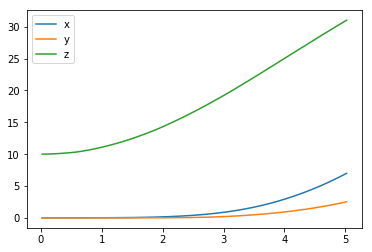

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

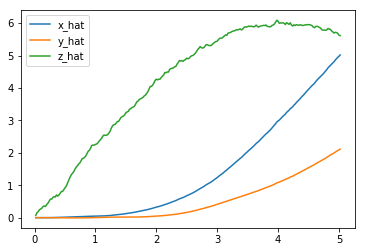

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

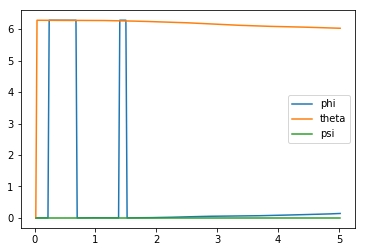

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

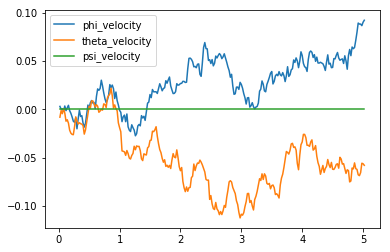

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

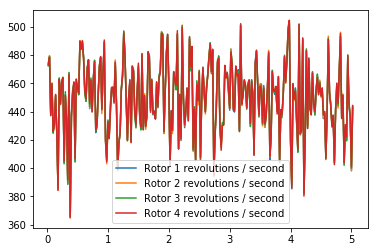

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 6.98877843  2.5265334  31.01613834  0.14153464  6.02847612  0.        ]
[5.01803059 2.11357468 5.6146646 ]
[ 0.09212068 -0.05802747  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done, info = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   22, score =   0.984 (best =   0.984), noise_scale = 1.65

/Users/yoongkang/udacity/udacity-machine-learning/RL-Quadcopter-2/physics_sim.py:131: RuntimeWarning: overflow encountered in multiply
  angles = self.pose[3:] + self.angular_v * self.dt + 0.5 * self.angular_accels * self.angular_accels * self.dt ** 2
/Users/yoongkang/udacity/udacity-machine-learning/RL-Quadcopter-2/physics_sim.py:90: RuntimeWarning: overflow encountered in multiply
  drag_moment =  self.C_d * 0.5 * self.rho * self.angular_v * np.absolute(self.angular_v) * self.areas * self.dims * self.dims


Episode = 1000, score =   0.976 (best =   0.988), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

# A minor deviation (student added)

The difficulty in getting the helper DDPG code to work (the one described in the notes) led me to explore other implementations of DDPG. The Udacity MLND Slack channel also showed many other people having trouble getting the starter code to learn even simple tasks. At this point, I cannot be sure that the starter code contains a correct implementation of DDPG.

I have found a library called `keras-rl` that has a DDPG agent, that allows us to specify all of the hyperparameters, without being worried about the implementation. 

I have borrowed the implementation for DDPG from this library, rather than the sample code given in the notes.

For this to be helpful, I want to first try to validate this with a simpler example, like Pendulum-v0. The following is my exploration

## Defining the task

Here's the task using the OpenAI Gym environment, Pendulum-v0. This is merely a delegator to the OpenAI environment.

The interface here is a useful reference, as the quadcopter is not an OpenAI environment.

In [10]:
import gym

class OpenAITask:
    """Task (environment) that defines the goal and provides feedback to the agent."""
    def __init__(self, env):
        # Simulation
        self.env = env

        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.shape[0]
        self.action_high = env.action_space.high
        self.action_low = env.action_space.low

        self.action_space = env.action_space
        self.observation_space = env.observation_space

        self.action_repeat = 1


    def step(self, action):
        """Uses action to obtain next state, reward, done."""
        next_state, reward, done, info = self.env.step(action)
        return next_state, reward, done, info

    def reset(self):
        """Reset the sim to start a new episode."""
        state = self.env.reset()
        return state

    def render(self, *args, **kwargs):
        return self.env.render(*args, **kwargs)
    

    
# The instance here:

openai_env = gym.make('Pendulum-v0')
np.random.seed(123)
openai_env.seed(123)
env = OpenAITask(openai_env)
nb_actions = env.action_space.shape[0]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


## Actor and critic models

Here, I will define the actor and critic neural networks, using the action space and observation space of the task. 

I will use a slightly different neural network architecture for the Critic. In the lecture notes, there were two "streams" for the state and action pathways. In here, we combine them from the get-go.

In [11]:
# Actor model
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Concatenate
from keras.optimizers import Adam

actor = Sequential()
actor.add(Flatten(input_shape=(1,) + env.observation_space.shape))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(nb_actions))
actor.add(Activation('linear'))
print(actor.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                64        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
__________

In [12]:
# Critic model
action_input = Input(shape=(nb_actions,), name='action_input')
state_input = Input(shape=(1,) + env.observation_space.shape, name='state_input')
flattened_observation = Flatten()(state_input)
x = Concatenate()([action_input, flattened_observation])
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(1)(x)
x = Activation('linear')(x)
critic = Model(inputs=[action_input, state_input], outputs=x)
print(critic.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state_input (InputLayer)        (None, 1, 3)         0                                            
__________________________________________________________________________________________________
action_input (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 3)            0           state_input[0][0]                
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 4)            0           action_input[0][0]               
                                                                 flatten_2[0][0]                  
__________

## The DDPG Agent

The DDPG agent exists in `keras-rl`, so let's import it and pass the hyperparameters, as well as the actor and critic models we defined.

There are also implementations of the Ornstein-Uhlenbeck Noise and the replay buffer already, so we'll import them too and pass them in.

In [13]:
from rl.memory import SequentialMemory
from rl.random import OrnsteinUhlenbeckProcess
from rl.callbacks import Callback

from agents.agent import DDPGAgent

memory = SequentialMemory(limit=100000, window_length=1)
random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=.15, mu=0., sigma=.3)
agent = DDPGAgent(nb_actions=nb_actions, actor=actor, critic=critic, critic_action_input=action_input,
                  memory=memory, nb_steps_warmup_critic=100, nb_steps_warmup_actor=100,
                  random_process=random_process, gamma=.99, target_model_update=1e-3)
agent.compile(Adam(lr=.001, clipnorm=1.), metrics=['mae'])

## Let's train our agent!

Now, that we have the agent, we can start training it. However, we want to also plot the rewards over episodes. 

We do that by specifying a callback action. Here it is below:

In [14]:
class SaveRewardsCallback(Callback):
    def __init__(self):
        self.rewards = []

    def on_episode_end(self, episode, logs={}):
        """Called at end of each episode"""
        episode_reward = logs['episode_reward']
        self.rewards.append(episode_reward)

my_callbacks = [SaveRewardsCallback()]


This will allow us to see the rewards over time. Now, we are ready to train the agent. 

The rewards over time will be plotted.

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 41s 4ms/step - reward: -6.7493
50 episodes - episode_reward: -1349.865 [-1853.611, -917.509] - loss: 2.557 - mean_absolute_error: 0.466 - mean_q: -31.803

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: -3.8412
50 episodes - episode_reward: -768.246 [-1492.490, -107.097] - loss: 13.831 - mean_absolute_error: 1.079 - mean_q: -72.180

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: -0.9900
50 episodes - episode_reward: -198.001 [-812.026, -1.740] - loss: 19.019 - mean_absolute_error: 1.536 - mean_q: -75.733

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: -0.6651
50 episodes - episode_reward: -133.027 [-330.559, -0.353] - loss: 17.988 - mean_absolute_error: 1.533 - mean_q: -61.497

Interval 5 (40000 steps performed

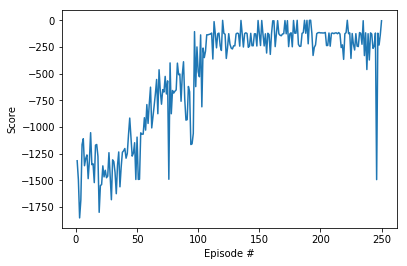

In [15]:
agent.fit(env, nb_steps=50000, visualize=False, verbose=1, nb_max_episode_steps=200, callbacks=my_callbacks)

rewards = my_callbacks[0].rewards

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards)+1), rewards)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The rewards plot should show an upwards trend. With this, we have confidence that our algorithm works, and we can now move on to the quadcopter.

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Defining the task

To maintain compatibility with OpenAI, I've had to change a number of things in the default task. Firstly, the `step()` function needs to return a tuple of 4 variables. I have also provided default implementations for `render()` (which does nothing), and some attributes that the `keras-rl` DDPG Agent needs.

In [24]:
# define target pose
target_pos = [0., 0., 50.]

env = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
nb_actions = env.action_space.shape[0]

## Actor and critic models

As before, I need to define the actor and critic models.

In [25]:
# Actor model
from keras.layers import Lambda

actor = Sequential()
actor.add(Flatten(input_shape=(1,) + env.observation_space.shape))
actor.add(Dense(32))
actor.add(Activation('relu'))
actor.add(Dense(64))
actor.add(Activation('relu'))
actor.add(Dense(32))
actor.add(Activation('relu'))
actor.add(Dense(nb_actions, name='raw_actions'))
actor.add(Activation('sigmoid'))
actor.add(Lambda(lambda x: (x * 900) + 0, name='actions'))  # hack by hardcoding action range

print(actor.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                224       
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_23 (Activation)   (None, 32)                0         
__________

In [26]:
# Critic model
action_input = Input(shape=(nb_actions,), name='action_input')
state_input = Input(shape=(1,) + env.observation_space.shape, name='state_input')
flattened_observation = Flatten()(state_input)
x = Concatenate()([action_input, flattened_observation])
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(1)(x)
x = Activation('linear')(x)
critic = Model(inputs=[action_input, state_input], outputs=x)
print(critic.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state_input (InputLayer)        (None, 1, 6)         0                                            
__________________________________________________________________________________________________
action_input (InputLayer)       (None, 4)            0                                            
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 6)            0           state_input[0][0]                
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 10)           0           action_input[0][0]               
                                                                 flatten_7[0][0]                  
__________

I can now define my model and train it, as before.

In [27]:
memory = SequentialMemory(limit=100000, window_length=1)
random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=.15, mu=0., sigma=.3)
agent = DDPGAgent(nb_actions=nb_actions, actor=actor, critic=critic, critic_action_input=action_input,
                  memory=memory, nb_steps_warmup_critic=100, nb_steps_warmup_actor=100,
                  random_process=random_process, gamma=.99, target_model_update=1e-3)
agent.compile(Adam(lr=.001, clipnorm=1.), metrics=['mae'])
my_callbacks = [SaveRewardsCallback()]

agent.fit(env, nb_steps=50000, visualize=False, verbose=1, nb_max_episode_steps=200, callbacks=my_callbacks)


Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 50s 5ms/step - reward: 0.8295
100 episodes - episode_reward: 82.589 [51.093, 160.062] - loss: 62.210 - mean_absolute_error: 2.620 - mean_q: -8.889

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 50s 5ms/step - reward: 0.8213
74 episodes - episode_reward: 110.854 [52.792, 187.477] - loss: 0.428 - mean_absolute_error: 0.337 - mean_q: 9.297

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 49s 5ms/step - reward: 0.8665
78 episodes - episode_reward: 110.458 [49.446, 175.760] - loss: 1.298 - mean_absolute_error: 0.510 - mean_q: 17.423

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 48s 5ms/step - reward: 0.8767
50 episodes - episode_reward: 175.340 [174.578, 175.923] - loss: 1.970 - mean_absolute_error: 0.373 - mean_q: 23.749

Interval 5 (40000 steps performed)
10000/10000 [==========

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

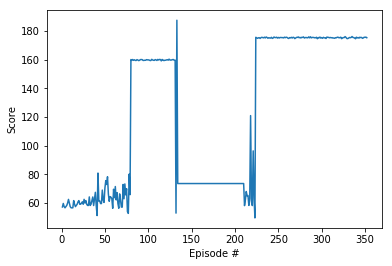

In [28]:
## TODO: Plot the rewards.
rewards = my_callbacks[0].rewards

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards)+1), rewards)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 

The task I specified had a goal target pose. The initial pose would be (0,0,10) and I wanted it to go up to (0,0,50).

The reward function applies a penalty the farther the quadcopter is from the final position. However, I didn't want large negative scores to affect the training too much -- so I scaled the distance by dividing the distance with the range of the axis.

I also applied a reward for the quadcopter to not crash -- so it receives 1 point at each timestep.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**What learning algorithm(s) did you try? What worked best for you?**
I chose the DDPG agent, as recommended in the instructor notes. However, I did not use the starter code given, but instead borrowed from a library called `keras-rl` which I had a lot more luck with. I tried tweaking the policy search algorithm in the beginning of this notebook, but did not have any luck.

The DDPG algorithm is an Actor-Critic implementation. The Actor tries to learn the optimal policy directly, whereas the Critic tries to estimate the Q function. The Actor uses the Critic's estimation to learn, rather than using the rewards.

**What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?**

There were a large number of hyperparameters for DDPG. Here's a few of the most relevant ones:

* Gamma -- 0.99
* Tau -- 0.001
* Learning rate -- 0.001
* Optimizer -- Adam
* Loss function -- Mean Absolute Error
* OU parameters: mu:0, sigma: 0.3, theta: 0.15
* Batch size: 32

**What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.**

I chose a very vanilla architecture, both for the Actor and the Critic. The Model summary can be seen above, but here it is again:

Actor model:

```

Layer (type)                 Output Shape              Param #   
=================================================================
flatten_6 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                224       
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_23 (Activation)   (None, 32)                0         
_________________________________________________________________
raw_actions (Dense)          (None, 4)                 132       
_________________________________________________________________
activation_24 (Activation)   (None, 4)                 0         
_________________________________________________________________
actions (Lambda)             (None, 4)                 0         
=================================================================
Total params: 4,548
Trainable params: 4,548
Non-trainable params: 0
_________________________________________________________________
```

All activations used "relu" except for the final two "output" layers. The layer called `raw_actions` uses a sigmoid activation function, giving an output between 0.0 and 1.0. I then used that to scale it to the range for the actions using a Lambda layer.



Here is my Critic network:

```
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
state_input (InputLayer)        (None, 1, 6)         0                                            
__________________________________________________________________________________________________
action_input (InputLayer)       (None, 4)            0                                            
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 6)            0           state_input[0][0]                
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 10)           0           action_input[0][0]               
                                                                 flatten_7[0][0]                  
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 32)           352         concatenate_3[0][0]              
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 32)           0           dense_22[0][0]                   
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 64)           2112        activation_25[0][0]              
__________________________________________________________________________________________________
activation_26 (Activation)      (None, 64)           0           dense_23[0][0]                   
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 32)           2080        activation_26[0][0]              
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 32)           0           dense_24[0][0]                   
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 1)            33          activation_27[0][0]              
__________________________________________________________________________________________________
activation_28 (Activation)      (None, 1)            0           dense_25[0][0]                   
==================================================================================================
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
__________________________________________________________________________________________________
```

Again, all the activations are "relu" except for the last one, which uses "linear".


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Was it an easy task to learn or hard?**

I think it was a fairly difficult task to learn given that the plot crashed halfway through the learning process (between episodes 160 and 210). It looks as though it was stuck in a local optima, and broke through it.

**Was there a gradual learning curve, or an aha moment?**

Based on the rewards plot, it looks like there were aha moments, notably at around episode 75 as well as episode 210.


**How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)**

The plot shows that it seems to have "converged" around a total reward of 175.0.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

**What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)**

The hardest part of the project was just getting started, honestly. I had a number of false starts because the starter code given did not work at all, even for the pendulum. I spent hours on it, but ended up looking elsewhere. I think I would have had more luck if I chose to take the time to implement an algorithm from scratch. Had I chosen that path, I probably would have chosen a simpler algorithm to implement, like REINFORCE. However, I was worried that it might not work at all.

This was also an algorithm that we knew little about. There was a short video series on Actor Critic methods, but they were more theoretical in nature -- it was pretty difficult to take that and apply it.

**Did you find anything interesting in how the quadcopter or your agent behaved?**

Yes, as mentioned the total rewards for the quadcopter crashed at around episode 160. My guess is that it was previously stuck in a local optima, and when it escaped it, the rewards temporarily dropped before climbing up again.
